In [72]:
import numpy as np
import pandas as pd


In [73]:
import pandas as pd

df = pd.read_csv(r"C:\Users\uttu2\OneDrive\Desktop\coding\deep learning\customer churn prediction\Churn_Modelling (1).csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.shape

(10000, 14)

In [75]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [76]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [77]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [78]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [79]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [80]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)   

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [85]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [86]:
X=df.drop('Exited', axis=1)
y=df['Exited']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   


In [88]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [89]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [90]:
X_train.shape

(8000, 10)

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Drop unnecessary columns (ignore if already dropped)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')

# 2️⃣ One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# ✅ Print to confirm correct columns
print("✅ Columns after encoding:\n", df.columns.tolist())

# 3️⃣ Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Sanity check: ensure no string columns remain
print("❓ Non-numeric columns in X_train:\n", X_train.select_dtypes(include=['object']).columns)

# 5️⃣ Scale numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Scaling successful! No 'France' or string errors anymore.")


✅ Columns after encoding:
 ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
❓ Non-numeric columns in X_train:
 Index([], dtype='object')

✅ Scaling successful! No 'France' or string errors anymore.


In [95]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [110]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim=11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   

In [117]:
history=model.fit(X_train_scaled, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8586 - val_loss: 0.3512 - val_accuracy: 0.8562
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8587 - val_loss: 0.3502 - val_accuracy: 0.8537
Epoch 3/10
200/200 [==============================] - 0s 979us/step - loss: 0.3464 - accuracy: 0.8603 - val_loss: 0.3484 - val_accuracy: 0.8569
Epoch 4/10
200/200 [==============================] - 0s 933us/step - loss: 0.3445 - accuracy: 0.8598 - val_loss: 0.3485 - val_accuracy: 0.8525
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8581 - val_loss: 0.3476 - val_accuracy: 0.8550
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8620 - val_loss: 0.3476 - val_accuracy: 0.8600
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8611 - val_loss: 0.3457 - val_accuracy: 0.8550
Ep

In [101]:
model.layers[0].get_weights()

[array([[ 0.02679693,  0.13284266,  0.06915396],
        [-2.0503166 , -2.093809  , -0.85901606],
        [-0.04240671, -0.02404951,  0.36389124],
        [-0.2608155 , -0.26933816, -0.73930895],
        [ 0.03912379,  0.10703854, -0.0288912 ],
        [-0.03103089, -0.19706444,  0.30062753],
        [ 0.41095057,  0.6015919 ,  1.2050482 ],
        [-0.06469425, -0.09615804,  0.09496866],
        [-0.56596094, -0.39029998, -0.5978817 ],
        [ 0.08898436,  0.14053847, -0.14682528],
        [ 0.69979495,  0.23415032,  0.6048465 ]], dtype=float32),
 array([0.27850118, 0.3269582 , 0.3472519 ], dtype=float32)]

In [103]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 679us/step


In [104]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035

In [115]:
import matplotlib.pyplot as plt

In [118]:
history.history

{'loss': [0.35058796405792236,
  0.3482658863067627,
  0.34636130928993225,
  0.3445175290107727,
  0.3435494303703308,
  0.34194624423980713,
  0.34172946214675903,
  0.3408268392086029,
  0.34045082330703735,
  0.3394688367843628],
 'accuracy': [0.858593761920929,
  0.8587499856948853,
  0.8603125214576721,
  0.8598437309265137,
  0.8581249713897705,
  0.8620312213897705,
  0.8610937595367432,
  0.8620312213897705,
  0.8598437309265137,
  0.8603125214576721],
 'val_loss': [0.351245641708374,
  0.3501906096935272,
  0.34844642877578735,
  0.34849345684051514,
  0.34758907556533813,
  0.3476303815841675,
  0.34570807218551636,
  0.3458831012248993,
  0.3453429341316223,
  0.34529921412467957],
 'val_accuracy': [0.856249988079071,
  0.8537499904632568,
  0.8568750023841858,
  0.8525000214576721,
  0.8550000190734863,
  0.8600000143051147,
  0.8550000190734863,
  0.8587499856948853,
  0.8556249737739563,
  0.8575000166893005]}

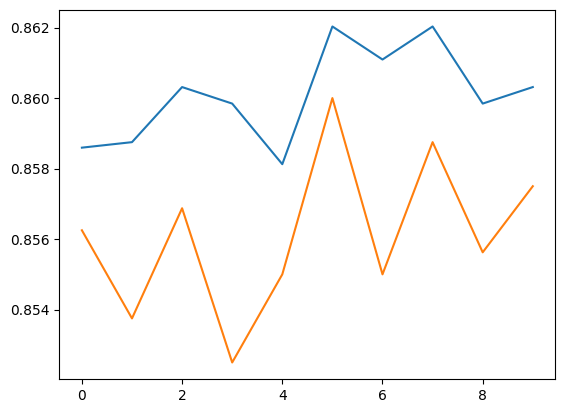

In [122]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])